In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
df = pd.read_csv('.../Energy_and_Water_Data_Disclosure_for_Local_Law_84_2019__Data_for_Calendar_Year_2018_.csv', index_col = 0)
df.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,City Building,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self - reported",NYC Building Identification Number (BIN),Address 1 (self - reported),Address 2 (self - reported),...,Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
Order,,,,,,,,,,,,,,,,,,,,,
1,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,No,1009970029,1009970029,1022631,1155 Avenue of the Americas,Not Available,...,Not Available,Not Available,No,04/30/2019 11:53:26 AM,40.756631,-73.982826,105.0,4.0,119.0,Midtown-Midtown South
2,8139,200,Not Applicable: Standalone Property,Not Applicable: Standalone Property,No,1013150001,1013150001,1037545,200 East 42nd St.,Not Available,...,7252.6,18.87,Yes,04/30/2019 11:53:27 AM,NaN,NaN,NaN,NaN,NaN,NaN
3,8604,114,Not Applicable: Standalone Property,Not Applicable: Standalone Property,No,1009990019,1009990019,1022667,114 West 47th st,Not Available,...,Not Available,Not Available,No,04/30/2019 11:53:27 AM,NaN,NaN,NaN,NaN,NaN,NaN
4,8841,733,Not Applicable: Standalone Property,Not Applicable: Standalone Property,No,1013190047,1013190047,1037596,733 Third Avenue,Not Available,...,Not Available,Not Available,No,04/30/2019 11:53:27 AM,40.753074,-73.972753,106.0,4.0,90.0,Turtle Bay-East Midtown
5,11809,Conde Nast Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,No,1009950005,1009950005,1085682,4 Times Square,Not Available,...,Not Available,Not Available,NaN,04/30/2019 11:53:27 AM,40.756181,-73.986244,105.0,4.0,119.0,Midtown-Midtown South


In [4]:
list(df.columns)

['Property Id',
 'Property Name',
 'Parent Property Id',
 'Parent Property Name',
 'City Building',
 'BBL - 10 digits',
 'NYC Borough, Block and Lot (BBL) self - reported',
 'NYC Building Identification Number (BIN)',
 'Address 1 (self - reported)',
 'Address 2 (self - reported)',
 'Postcode',
 'Street Number',
 'Street Name',
 'Borough',
 'DOF Gross Floor Area  (ft²)',
 'Self-Reported Gross Floor Area (ft²)',
 'Primary Property Type - Self Selected',
 'List of All Property Use Types at Property',
 'Largest Property Use Type',
 'Largest Property Use Type - Gross Floor Area (ft²)',
 '2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Year Built',
 'Number of Buildings',
 'Occupancy',
 'Metered Areas (Energy)',
 'Metered Areas  (Water)',
 'ENERGY STAR Score',
 'Source EUI (kBtu/ft²)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'Site EUI (kBtu/ft²)',
 'Weath

In [137]:
df.loc[:100,['Year Built', 'Direct GHG Emissions (Metric Tons CO2e)']]

,Year Built,Direct GHG Emissions (Metric Tons CO2e)
Order,,
1,1982,0
2,1956,0
3,1989,51.2
4,1961,0
5,1999,1991.7
...,...,...
96,1930,0
97,1992,0
98,1986,0


In [138]:
modern = df[df['Year Built'] > 1980]
modern['Year Built']

Order
1        1982
3        1989
5        1999
9        1991
10       1994
         ... 
25912    2008
25913    2015
25916    1987
25921    1986
25937    2015
Name: Year Built, Length: 5022, dtype: int64

In [139]:
df['Direct GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(df['Direct GHG Emissions (Metric Tons CO2e)'], errors='coerce')
df['Direct GHG Emissions (Metric Tons CO2e)']

Order
1           0.0
2           0.0
3          51.2
4           0.0
5        1991.7
          ...  
25935     193.7
25936    1207.8
25937      66.7
25938       NaN
25939     748.8
Name: Direct GHG Emissions (Metric Tons CO2e), Length: 25939, dtype: float64

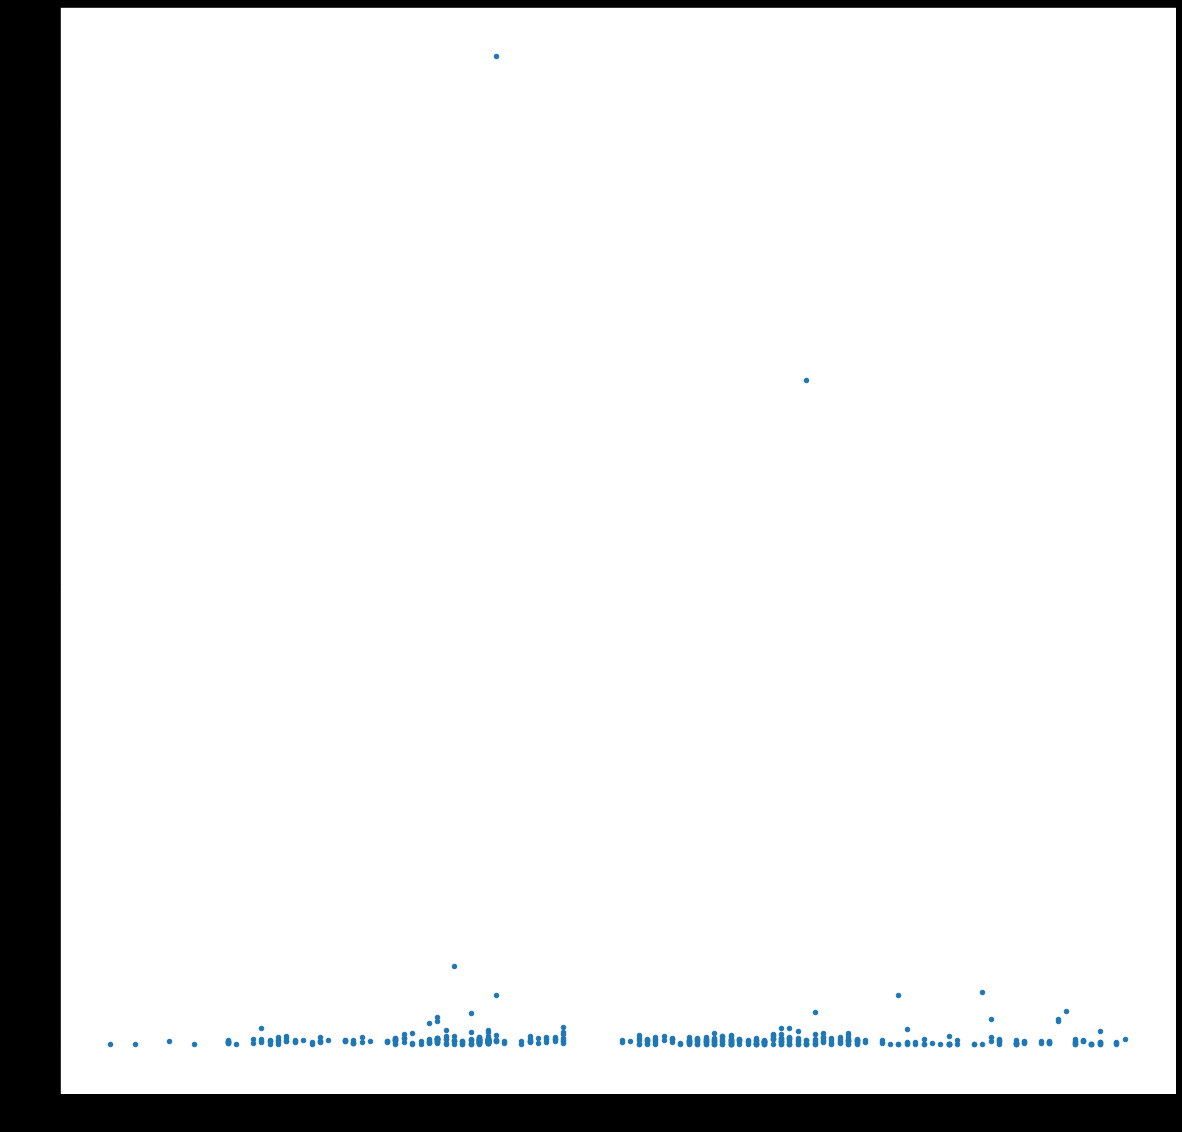

In [140]:
df.loc[:500].plot.scatter('Year Built', 'Direct GHG Emissions (Metric Tons CO2e)')
plt.show()

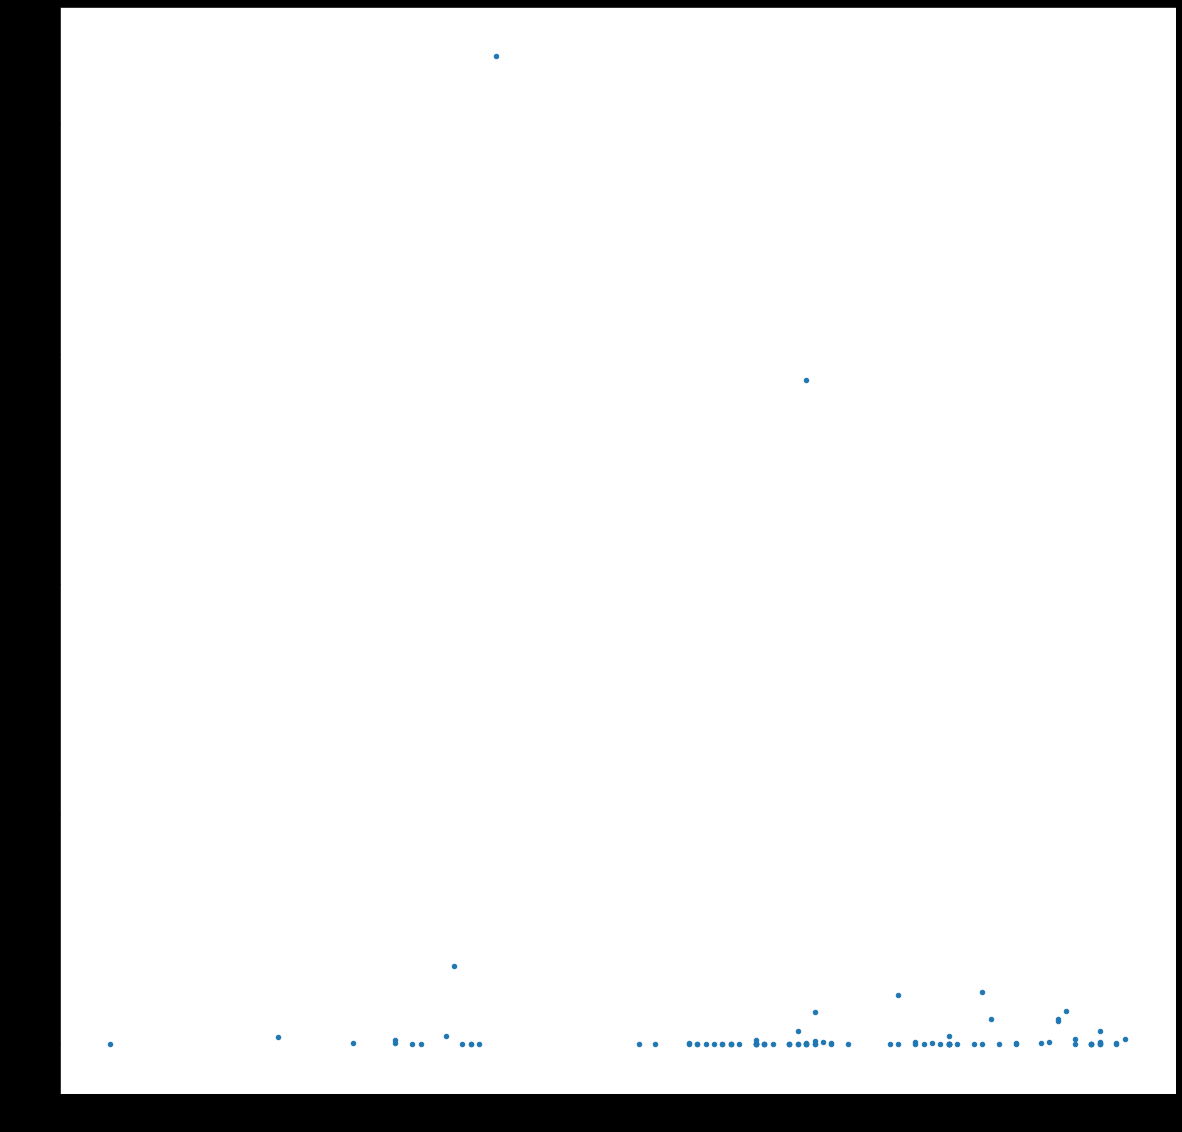

In [141]:
df.loc[:100].plot.scatter('Year Built', 'Direct GHG Emissions (Metric Tons CO2e)')
plt.show()


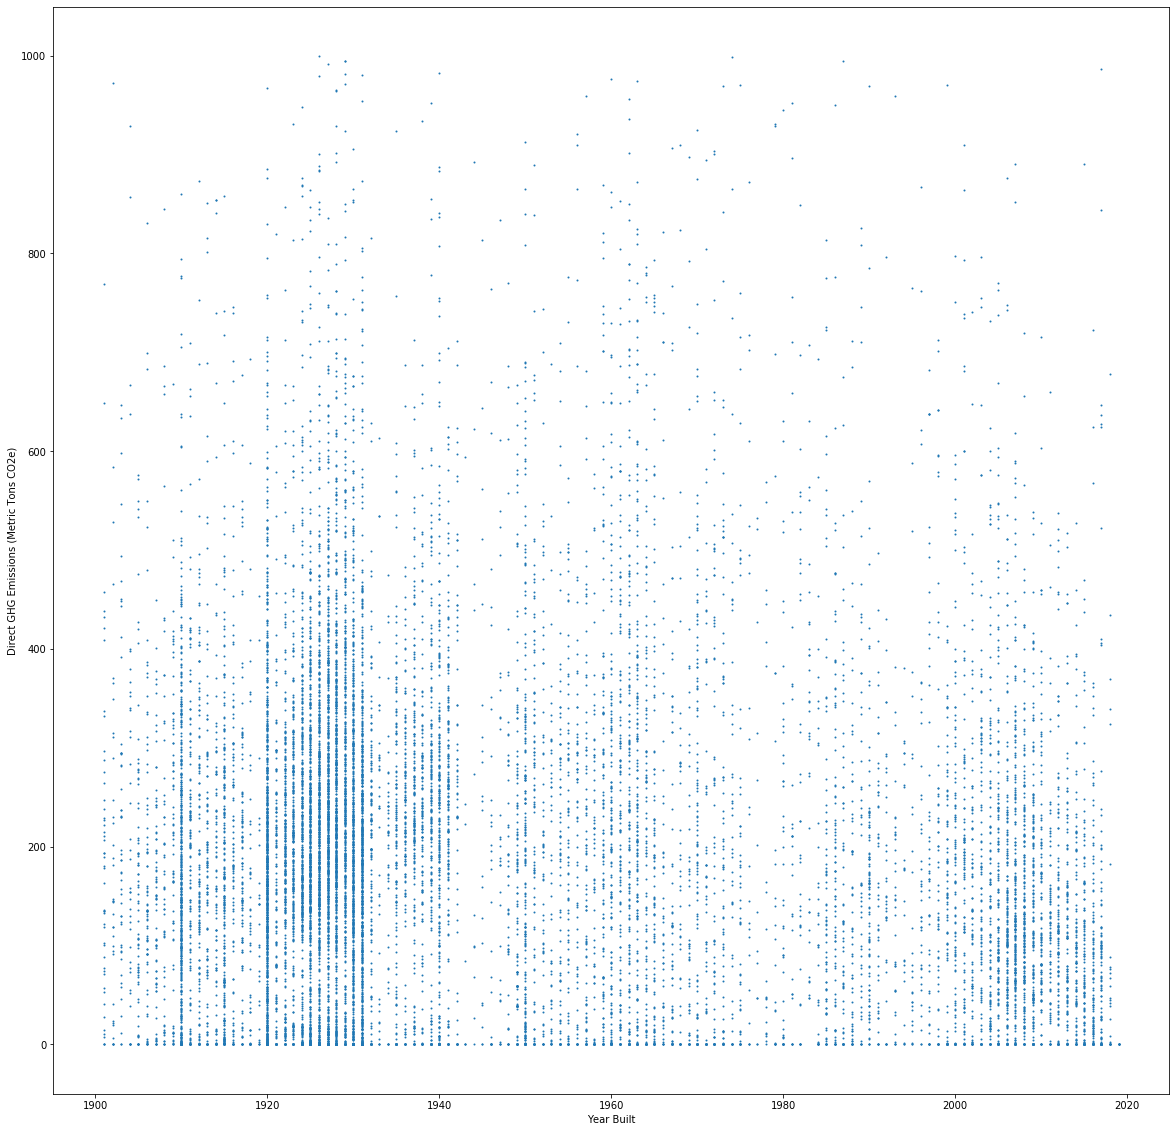

In [144]:
df[(df['Direct GHG Emissions (Metric Tons CO2e)'] < 1000) & (df['Year Built'] > 1900) & (df['Year Built'] < 2020) & (df['DOF Gross Floor Area  (ft²)'] < 220000)].plot.scatter('Year Built', 'Direct GHG Emissions (Metric Tons CO2e)', s = 1)
plt.show()

In [132]:
len(df)

25939

In [133]:
np.mean(df['DOF Gross Floor Area  (ft²)'])

120071.39845001292